In [10]:
import matplotlib.pyplot as plt                               # basic plotting
from matplotlib.ticker import ScalarFormatter
import numpy as np                                            # for basic array manipulation
import pandas as pd                                           # for dataframe manipulation
import seaborn as sns                                         # slightly better plotting
import time
import datetime                                               # for timestamp
import pandas as pd

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

In [10]:
cd pppmaster/

/content/drive/Shareddrives/NiyamIT - Practicum Project/pppmaster


In [12]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset if needed below
# warnings.filterwarnings("default")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [14]:
df = pd.DataFrame(pd.read_csv('ppp_model.csv'))

In [15]:
anomaly_inputs = ['ProcessingMethod','LoanStatus','Term',
                  'InitialApprovalAmount','CurrentApprovalAmount','ForgivenessAmount',
                  'RuralUrbanIndicator','HubzoneIndicator','LMIIndicator','BusinessAgeDescription',
                  'CD','JobsReported','NonProfit','BusinessType','NAICS Industry Description','Size standards in number of employees',
                  'UTILITIES_PROCEED','PAYROLL_PROCEED','MORTGAGE_INTEREST_PROCEED','RENT_PROCEED','REFINANCE_EIDL_PROCEED',
                  'HEALTH_CARE_PROCEED','DEBT_INTEREST_PROCEED',
                  'non_forgiven_loan_portion','ApprovalDifference',
                  'ApprovalDifference_per_employee','InitialApprovalAmount_per_employee','CurrentApprovalAmount_per_employee',
                  'UTILITIES_PROCEED_per_employee','PAYROLL_PROCEED_per_employee','MORTGAGE_INTEREST_PROCEED_per_employee',
                  'RENT_PROCEED_per_employee','REFINANCE_EIDL_PROCEED_per_employee','HEALTH_CARE_PROCEED_per_employee',
                  'DEBT_INTEREST_PROCEED_per_employee','ForgivenessAmount_per_employee',
                  'BorrowerCity','BorrowerState',
                  'ServicingLenderCity','ServicingLenderState','ServicingLenderLocationID',
                  'ProjectCity','ProjectState',
                  'OriginatingLenderLocationID','OriginatingLender','OriginatingLenderCity','OriginatingLenderState',
                  'deviant_JR','deviant_UTILITIES_PROCEED','deviant_PAYROLL_PROCEED','deviant_MORTGAGE_INTEREST_PROCEED',
                  'deviant_RENT_PROCEED','deviant_REFINANCE_EIDL_PROCEED','deviant_HEALTH_CARE_PROCEED',
                  'deviant_DEBT_INTEREST_PROCEED','deviant_ForgivenessAmount','deviant_ApprovalDifference',
                  'deviant_InitialApprovalAmount','deviant_CurrentApprovalAmount']

In [16]:
# Replace infinities with nan
for col in anomaly_inputs:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
df.dropna(subset=anomaly_inputs, inplace=True)

In [17]:
df1=df.copy()

In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Convert categorical features in anomaly_inputs to numerical using LabelEncoder
label_encoders = {}
for col in anomaly_inputs:
    if df[col].dtype == 'object' or df[col].dtype == 'int64':  # Check for object (string) or integer types
        # Convert the entire column to string type before encoding
        df[col] = df[col].astype(str)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[anomaly_inputs] = scaler.fit_transform(df[anomaly_inputs])


# Create and fit the Isolation Forest model
clf = IsolationForest(n_estimators=50, random_state=12345)
clf.fit(df[anomaly_inputs])


IsolationForest(n_estimators=50, random_state=12345)

In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

# Assuming df is your DataFrame and anomaly_inputs are the features
X = df[anomaly_inputs]

# Define a custom scorer based on silhouette score or any other suitable metric
def custom_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_samples': ['auto', 0.5, 0.75],
    'contamination': [0.01, 0.05, 0.1],
    # Add other parameters as needed
}

# Create a IsolationForest instance
clf = IsolationForest(random_state=12345)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=make_scorer(custom_scorer), cv=3, verbose=2)

# Fit the grid search to the data
grid_search.fit(X)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END contamination=0.01, max_samples=auto, n_estimators=50; total time=  36.5s
[CV] END contamination=0.01, max_samples=auto, n_estimators=50; total time=  40.1s
[CV] END contamination=0.01, max_samples=auto, n_estimators=50; total time=  39.9s
[CV] END contamination=0.01, max_samples=auto, n_estimators=100; total time= 1.2min
[CV] END contamination=0.01, max_samples=auto, n_estimators=100; total time= 1.2min
[CV] END contamination=0.01, max_samples=auto, n_estimators=100; total time= 1.2min
[CV] END contamination=0.01, max_samples=auto, n_estimators=150; total time= 1.8min
[CV] END contamination=0.01, max_samples=auto, n_estimators=150; total time= 1.8min
[CV] END contamination=0.01, max_samples=auto, n_estimators=150; total time= 1.8min
[CV] END contamination=0.01, max_samples=auto, n_estimators=200; total time= 2.3min
[CV] END contamination=0.01, max_samples=auto, n_estimators=200; total time= 2.3min
[CV] END contamin

In [20]:
from sklearn.ensemble import IsolationForest

# Assuming df is your DataFrame and anomaly_inputs are the features

# Your preprocessing steps for label encoding and scaling
label_encoders = {}
for col in anomaly_inputs:
    if df[col].dtype == 'object' or df[col].dtype == 'int64':
        df[col] = df[col].astype(str)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

scaler = StandardScaler()
df[anomaly_inputs] = scaler.fit_transform(df[anomaly_inputs])

# Fit the Isolation Forest model with the best parameters from grid search
best_params = {'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 50}
clf = IsolationForest(**best_params, random_state=12345)
clf.fit(df[anomaly_inputs])
# The model is now fitted with the best parameters


IsolationForest(contamination=0.01, n_estimators=50, random_state=12345)

In [21]:
def isolation_forest_feature_importance(iforest):
    """
    Calculate feature importance for Isolation Forest.
    """
    # Shape of the feature space
    n_features = df[anomaly_inputs].shape[1]

    # Initialize the feature importance array
    feature_importance = np.zeros(n_features)

    for tree in iforest.estimators_:
        # Get the node feature of each tree
        node_features = tree.tree_.feature

        # Count the occurrence of each feature split in the tree paths
        feature_count = np.bincount(node_features[node_features >= 0], minlength=n_features)

        feature_importance += feature_count

    # Normalize the feature importances
    feature_importance /= len(iforest.estimators_)

    return feature_importance

importances = isolation_forest_feature_importance(clf)

# Display feature importances
for i, (col, importance) in enumerate(sorted(zip(anomaly_inputs, importances), key=lambda x: -x[1])):
    print(f"{i + 1}. Feature '{col}': {importance}")

1. Feature 'PAYROLL_PROCEED_per_employee': 1.42
2. Feature 'Size standards in number of employees': 1.34
3. Feature 'ForgivenessAmount': 1.28
4. Feature 'JobsReported': 1.2
5. Feature 'BorrowerState': 1.18
6. Feature 'OriginatingLenderLocationID': 1.16
7. Feature 'ProjectCity': 1.12
8. Feature 'OriginatingLenderCity': 1.08
9. Feature 'CurrentApprovalAmount': 1.06
10. Feature 'non_forgiven_loan_portion': 1.06
11. Feature 'NAICS Industry Description': 1.04
12. Feature 'InitialApprovalAmount_per_employee': 1.04
13. Feature 'ServicingLenderLocationID': 1.02
14. Feature 'ProjectState': 1.02
15. Feature 'deviant_ForgivenessAmount': 1.02
16. Feature 'ForgivenessAmount_per_employee': 1.0
17. Feature 'ServicingLenderState': 0.96
18. Feature 'deviant_JR': 0.96
19. Feature 'CurrentApprovalAmount_per_employee': 0.92
20. Feature 'BorrowerCity': 0.92
21. Feature 'CD': 0.9
22. Feature 'ServicingLenderCity': 0.88
23. Feature 'BusinessType': 0.86
24. Feature 'deviant_CurrentApprovalAmount': 0.86
25. Fe

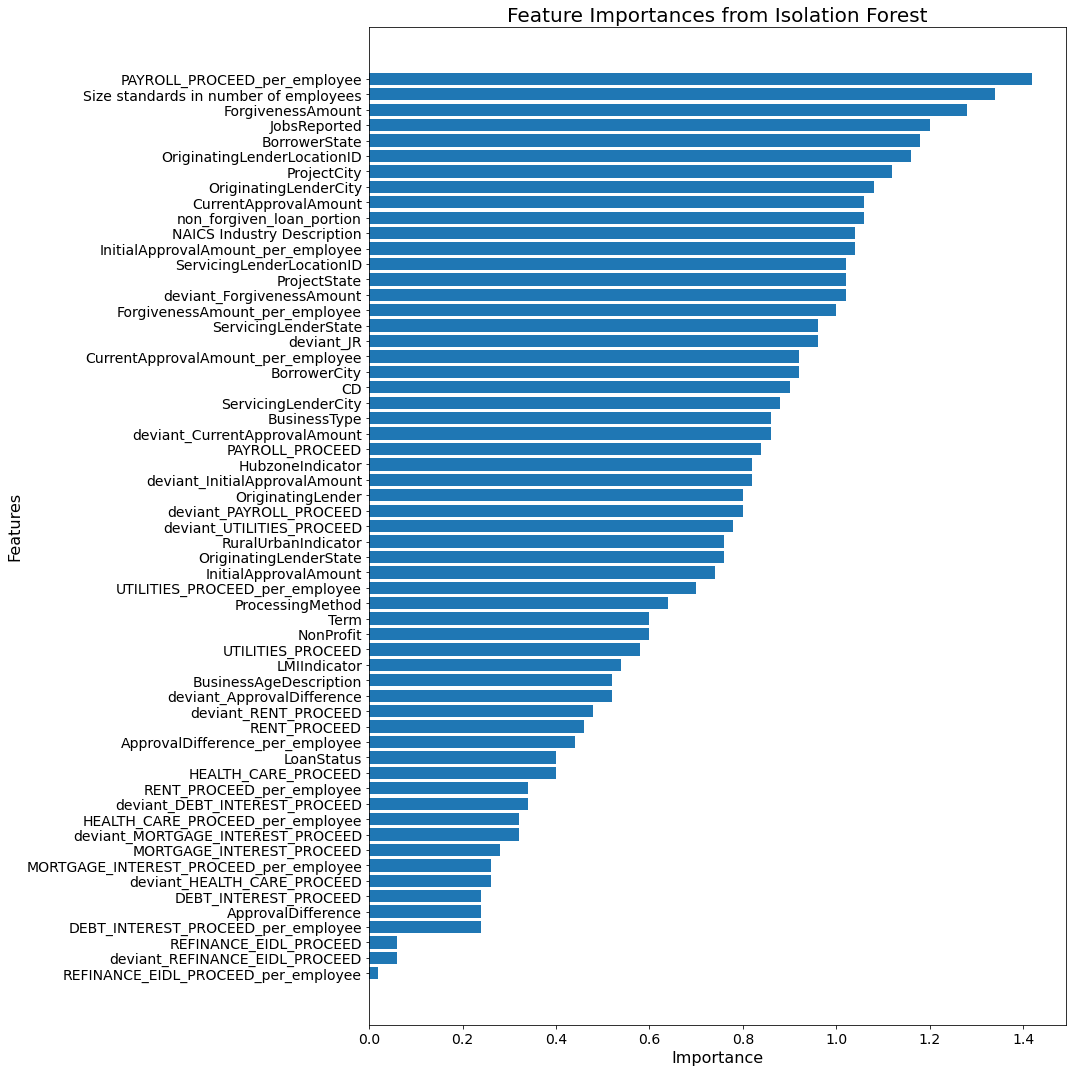

In [22]:
sorted_features, sorted_importances = zip(*sorted(zip(anomaly_inputs, importances), key=lambda x: -x[1]))

plt.figure(figsize=(15, 15)) 
plt.title('Feature Importances from Isolation Forest', fontsize=20)
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()

In [23]:
df1['scores'] = clf.decision_function(df[anomaly_inputs])
df1['anomaly_score'] = clf.predict(df[anomaly_inputs])

In [24]:
# Assuming df1['scores'] contains the anomaly scores from -1 to 1
min_score = df1['scores'].min()
max_score = df1['scores'].max()

# Transforming the scores to a 0-1 range
df1['normalized_scores'] = (df1['scores'] - min_score) / (max_score - min_score)

In [25]:
predictions = clf.predict(df[anomaly_inputs])
df1["anomaly"] = [1 if x == -1 else 0 for x in predictions]

In [26]:
num_anomalies = (predictions == -1).sum()
num_normal = (predictions == 1).sum()

print(f"Number of anomalies detected: {num_anomalies}")
print(f"Number of normal data points: {num_normal}")

Number of anomalies detected: 9656
Number of normal data points: 955892


In [27]:
df1.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,state_name,scores,anomaly_score,normalized_scores,anomaly
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96,0.35,UNKNOWN/NOTSTATED,0.12,1,0.78,0
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248

In [30]:
#Importing libraries
import h2o
import subprocess
from h2o.estimators import H2OIsolationForestEstimator
from h2o.backend import H2OLocalServer                            # for plotting local tree in-notebook
from h2o.grid.grid_search import H2OGridSearch
import os
import re
import pygraphviz as pgv
from IPython.display import Image
from IPython.display import display

# set number of threads
NTHREAD = 4

h2o.init(max_mem_size='8G', nthreads=NTHREAD) # start h2o with plenty of memory and threads
h2o.remove_all()                              # clears h2o memory
h2o.no_progress()                             # turn off h2o progress indicators    

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 30 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_bagyawidanagamage_ulq10l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.264 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [31]:
#train = h2o.import_file('ppp_model.csv') #in this file was their a column named 'anomaly'?
df1.to_csv('ppp_SKLIF_model_results.csv', index=False)
train = h2o.import_file('ppp_SKLIF_model_results.csv')

In [37]:
from h2o.estimators import H2OIsolationForestEstimator
model_id = 'dtsklearn_surrogate_mojo'
global_surrogate_dt = H2OIsolationForestEstimator(model_id = model_id,
                                               ntrees = 1, max_depth = 3,
                                               sample_rate = 1, mtries = 2, seed=12345)
global_surrogate_dt.train(training_frame = train, x = anomaly_inputs, y = "anomaly")

Model Details
=============
H2OIsolationForestEstimator : Isolation Forest
Model Key: dtsklearn_surrogate_mojo


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1                  1                           133                    3            3            3             6             6             6

ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: NaN
Normalized Anomaly Score: NaN

Scoring History: 
    timestamp            duration    number_of_trees    mean_tree_path_length    mean_anomaly_score
--  -------------------  ----------  -----------------  -----------------------  --------------------
    2023-11-26 02:15:38  0.006 sec   0                  nan                      nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [38]:
mojo_path = global_surrogate_dt.download_mojo(path='.')
print('Generated MOJO path:\n', mojo_path)

Generated MOJO path:
 /Users/bagyawidanagamage/PracticumProject/dtsklearn_surrogate_mojo.zip


In [39]:
from h2o.backend import H2OLocalServer
import os
import re
import subprocess

# title for plot
title = 'PPP Loan Anomaly Decision Tree Surrogate'

# locate h2o jar
hs = H2OLocalServer()
h2o_jar_path = hs._find_jar()
print('Discovered H2O jar path:\n', h2o_jar_path)

# construct command line call to generate graphviz version of
# surrogate tree see for more information:
# http://docs.h2o.ai/h2o/latest-stable/h2o-genmodel/javadoc/index.html
gv_file_name = model_id + '.gv'
gv_args = str('-cp ' + h2o_jar_path +
              ' hex.genmodel.tools.PrintMojo --tree 0 -i '
              + mojo_path + ' -o').split()
gv_args.insert(0, 'java')
gv_args.append(gv_file_name)
if title is not None:
    gv_args = gv_args + ['--title', title]

# call
print()
print('Calling external process ...')
print(' '.join(gv_args))
# if the line below is failing for you, try instead:
#_ = subprocess.call(gv_args, shell=True)
_ = subprocess.call(gv_args)


Discovered H2O jar path:
 /opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar

Calling external process ...
java -cp /opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i /Users/bagyawidanagamage/PracticumProject/dtsklearn_surrogate_mojo.zip -o dtsklearn_surrogate_mojo.gv --title PPP Loan Anomaly Decision Tree Surrogate


In [40]:
#get the .gv file path
gv_file_path = os.path.abspath(gv_file_name)
gv_file_path

'/Users/bagyawidanagamage/PracticumProject/dtsklearn_surrogate_mojo.gv'

In [41]:
#import os
#import pygraphviz as pgv

# Add the path to the Graphviz bin folder to the PATH environment variable
# Replace '/path/to/graphviz/bin' with the actual path to the Graphviz bin directory
graphviz_path = '/usr/local/bin/'  # You need to find out the correct path
os.environ['PATH'] += os.pathsep + graphviz_path

def convert_gv_to_png(input_file, output_file):
    graph = pgv.AGraph(string=open(input_file).read())
    graph.layout(prog='dot')  # Use dot layout engine
    graph.draw(output_file, format='png')

gv_file = "dtsklearn_surrogate_mojo.gv"
png_file = "dtsklearn_surrogate_mojo.png"
convert_gv_to_png(gv_file, png_file)


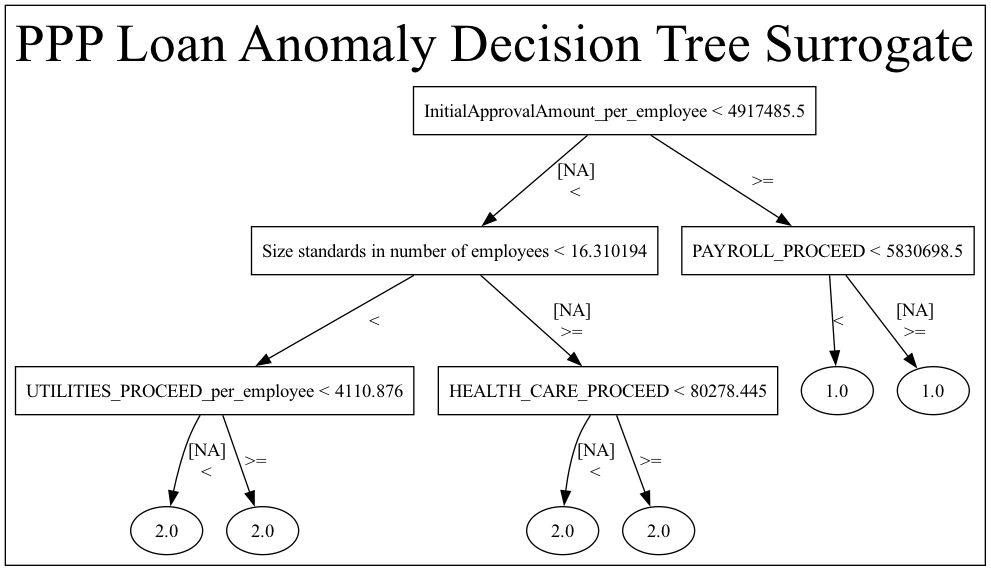

In [42]:
# display in-notebook
display(Image((png_file)))

In [44]:
df1.to_csv('ppp_model_final.csv', index=False)